<a href="https://colab.research.google.com/github/akshithaa1/project_ML/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading dataset**

In [ ]:
d_train=pd.read_csv('train.csv')
d_test=pd.read_csv('test.csv')

In [ ]:
d_train.shape

(1460, 81)

In [ ]:
d_test.shape

(1459, 80)

In [ ]:
d=pd.concat([d_train,d_test],axis=0)

In [ ]:
print(d.shape)

(2919, 81)


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
d.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# **Handling null values**

In [ ]:
d.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
d.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
d.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: >

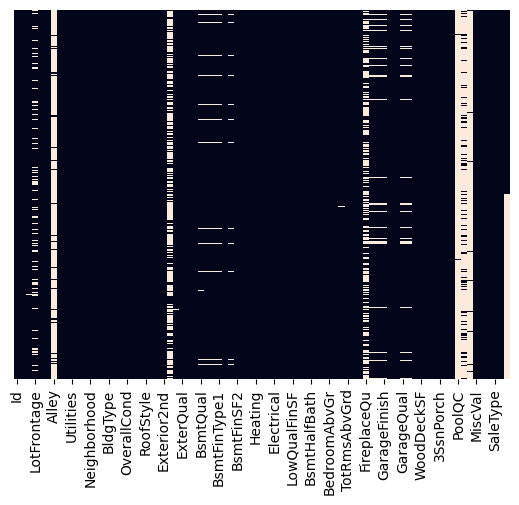

In [ ]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False)

In [ ]:
d.shape

(2919, 81)

In [ ]:
d['LotFrontage']=d['LotFrontage'].fillna(d['LotFrontage'].mean())
d['SalePrice']=d['SalePrice'].fillna(d['SalePrice'].mean())

In [ ]:
d['SaleType']=d['SaleType'].fillna(d['SaleType'].mode()[0])
d['BsmtQual']=d['BsmtQual'].fillna(d['BsmtQual'].mode()[0])
d['BsmtCond']=d['BsmtCond'].fillna(d['BsmtCond'].mode()[0])
d['MSZoning']=d['MSZoning'].fillna(d['MSZoning'].mode()[0])

In [ ]:
d['FireplaceQu'].isnull().sum()

1420

In [ ]:
d['GarageType'].isnull().sum()

157

In [ ]:
d['GarageYrBlt'].isnull().sum()

159

In [ ]:
d['GarageFinish'].isnull().sum()

159

In [ ]:
d['GarageQual'].isnull().sum()

159

In [ ]:
d['GarageCond'].isnull().sum()

159

In [ ]:
d['FireplaceQu']=d['FireplaceQu'].fillna(d['FireplaceQu'].mode()[0])

In [ ]:
d['GarageType']=d['GarageType'].fillna(d['GarageType'].mode()[0])
d['GarageYrBlt']=d['GarageYrBlt'].fillna(d['GarageYrBlt'].mode()[0])
d['GarageFinish']=d['GarageFinish'].fillna(d['GarageFinish'].mode()[0])
d['GarageQual']=d['GarageQual'].fillna(d['GarageQual'].mode()[0])
d['GarageCond']=d['GarageCond'].fillna(d['GarageCond'].mode()[0])

<Axes: >

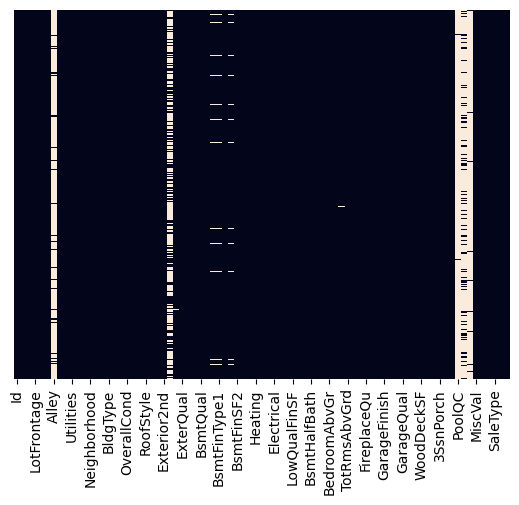

In [ ]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False)

In [ ]:
d['Alley'].isnull().sum()

2721

In [ ]:
d['MasVnrType'].isnull().sum()

1766

In [ ]:
d['PoolQC'].isnull().sum()

2909

In [ ]:
d['Fence'].isnull().sum()

2348

In [ ]:
d['MiscFeature'].isnull().sum()

2814

In [ ]:
d.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
d.shape

(2919, 78)

In [ ]:
d.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [ ]:
d['MasVnrType']=d['MasVnrType'].fillna(d['MasVnrType'].mode()[0])
d['MasVnrArea']=d['MasVnrArea'].fillna(d['MasVnrArea'].mode()[0])

In [ ]:
d['BsmtFinSF1'].isnull().sum()

1

In [ ]:
d['BsmtUnfSF'].isnull().sum()

1

In [ ]:
d['BsmtExposure'].isnull().sum()

82

In [ ]:
d['BsmtFinType1'].isnull().sum()

79

In [ ]:
d['BsmtFinType1']=d['BsmtFinType1'].fillna(d['BsmtFinType1'].mode()[0])
d['BsmtExposure']=d['BsmtExposure'].fillna(d['BsmtExposure'].mode()[0])
d['BsmtFinType2']=d['BsmtFinType2'].fillna(d['BsmtFinType2'].mode()[0])
d['BsmtFinSF1']=d['BsmtFinType1'].fillna(d['BsmtFinType1'].mode()[0])
d['SaleType']=d['SaleType'].fillna(d['SaleType'].mode()[0])
d['BsmtUnfSF']=d['BsmtUnfSF'].fillna(d['BsmtUnfSF'].mode()[0])

In [ ]:
d.drop(['Alley'],axis=1,inplace=True)

<Axes: >

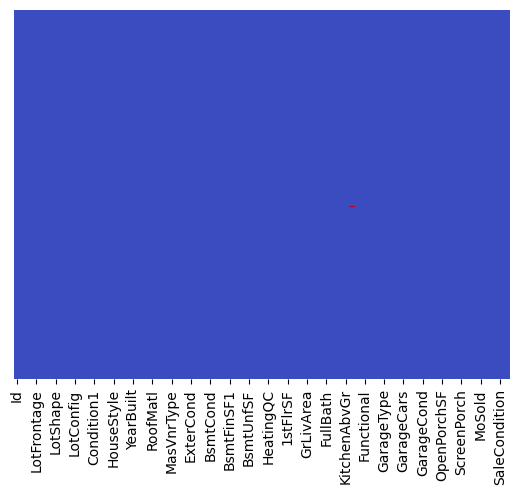

In [ ]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
d['Functional']=d['Functional'].fillna(d['Functional'].mode()[0])

<Axes: >

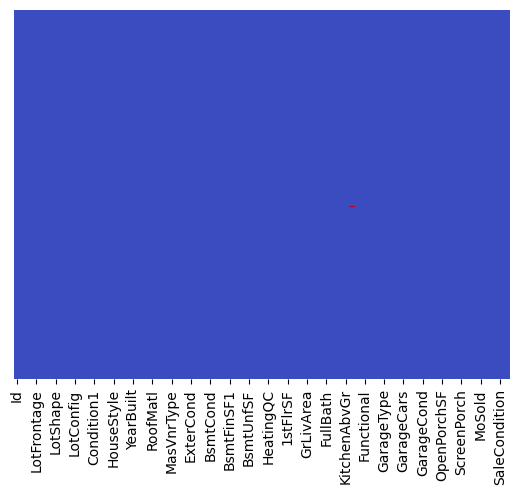

In [ ]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
d.shape

(2919, 77)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [ ]:
d.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

# **Handling categorical data**

In [ ]:
#handle categorical data
cat_cols1=d.select_dtypes(include=['object']).columns.tolist()
num_cols1= d.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols1)
print("Numerical Variables:")
print(num_cols1)

Categorical Variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 

In [ ]:
cat_cols1

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
d['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
d['ExterQual'].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [ ]:
d['ExterQual']=d['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [ ]:
d['ExterQual'].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [ ]:
d['BsmtExposure'].value_counts()

BsmtExposure
No    1986
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [ ]:
d['BsmtExposure']=d['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes

In [ ]:
d['BsmtExposure'].value_counts()

BsmtExposure
1    1986
3     418
4     276
2     239
Name: count, dtype: int64

In [ ]:
d['ExterCond']=d['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['BsmtQual']=d['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['BsmtCond']=d['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['HeatingQC']=d['HeatingQC'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
d['KitchenQual']=d['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['FireplaceQu']=d['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['GarageQual']=d['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['GarageCond']=d['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
d['Functional']=d['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes
d['GarageFinish']=d['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
d['PavedDrive']=d['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
d['Utilities']=d['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSeWr','AllPub'],ordered=True)).cat.codes
d['BsmtFinType1']=d['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
d['BsmtFinType2']=d['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [ ]:
d_encod=d.copy()

In [ ]:
object_fea=d_encod.select_dtypes(include='object').columns.tolist()
print(len(object_fea))
print(object_fea)

24
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinSF1', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']


In [ ]:
d_encod[object_fea].head(2)

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Exterior2nd,MasVnrType,Foundation,BsmtFinSF1,Heating,CentralAir,Electrical,GarageType,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GLQ,GasA,Y,SBrkr,Attchd,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,MetalSd,BrkFace,CBlock,ALQ,GasA,Y,SBrkr,Attchd,WD,Normal


In [ ]:
print("bfr",d_encod.shape)
d_encod=pd.get_dummies(d_encod,
                       columns=object_fea,
                       prefix=object_fea,
                       drop_first=True)
print("aftr",d_encod.shape)

bfr (2919, 77)
aftr (2919, 201)


In [ ]:
d_encod.head(10)

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,3,7,5,2003,2003,196.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.000000,9600,3,6,8,1976,1976,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.000000,11250,3,7,5,2001,2002,162.0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.000000,9550,3,7,5,1915,1970,0.0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.000000,14260,3,8,5,2000,2000,350.0,...,False,False,False,False,True,False,False,False,True,False
5,6,50,85.000000,14115,3,5,5,1993,1995,0.0,...,False,False,False,False,True,False,False,False,True,False
6,7,20,75.000000,10084,3,8,5,2004,2005,186.0,...,False,False,False,False,True,False,False,False,True,False
7,8,60,69.305795,10382,3,7,6,1973,1973,240.0,...,False,False,False,False,True,False,False,False,True,False
8,9,50,51.000000,6120,3,7,5,1931,1950,0.0,...,False,False,False,False,True,False,False,False,False,False
9,10,190,50.000000,7420,3,5,6,1939,1950,0.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
d_encod['HasPool'] = np.where(d_encod['PoolArea'] > 0, 1, 0)

In [ ]:
d_encod['PoolArea'].head(1424)

0         0
1         0
2         0
3         0
4         0
       ... 
1419      0
1420      0
1421      0
1422      0
1423    738
Name: PoolArea, Length: 1424, dtype: int64

In [ ]:
d_encod['HasPool'].head(1424)

0       0
1       0
2       0
3       0
4       0
       ..
1419    0
1420    0
1421    0
1422    0
1423    1
Name: HasPool, Length: 1424, dtype: int64

In [ ]:
d_encod['Age'] = d_encod['YrSold'] - d_encod['YearBuilt']

In [ ]:
d_encod['RemodelAge'] = d_encod['YrSold'] - d_encod['YearRemodAdd']

In [ ]:
d_encod['IsRemodeled'] = np.where(d_encod['YearBuilt'] != d_encod['YearRemodAdd'], 1, 0)

In [ ]:
d_encod['TotalLivingArea'] = d_encod['GrLivArea'] + d_encod['TotalBsmtSF']

In [ ]:
d_encod['HasFireplace'] = np.where(d_encod['Fireplaces'] > 0, 1, 0)

In [ ]:
d_encod['HasGarage'] = np.where(d_encod['GarageArea'] > 0, 1, 0)

In [ ]:
d_encod['TotalSF'] = d_encod['TotalBsmtSF'] + d_encod['1stFlrSF'] + d_encod['2ndFlrSF']

In [ ]:
d_encod.select_dtypes(include='object').columns.tolist()

[]

In [ ]:
d_encod.shape

(2919, 209)

In [ ]:
d_encod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 209 entries, Id to TotalSF
dtypes: bool(148), float64(13), int64(32), int8(16)
memory usage: 1.5 MB


In [ ]:
d_train.shape[0]

1460

In [ ]:
d_encod.shape[0]

2919

In [ ]:
len_train=d_train.shape[0]
len_train

1460

In [ ]:
x_train=d_encod[:len_train].drop("SalePrice",axis=1)
#y_train=d_encod[:len_train].SalePrice
y_train=d_encod["SalePrice"][:len_train]
x_test=d_encod[len_train:].drop("SalePrice",axis=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1460, 208)
(1460,)
(1459, 208)


# **feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test1=sc.transform(x_test)

In [ ]:
x_train

array([[-1.73086488e+00,  7.33749635e-02, -2.23357059e-01, ...,
        -1.05638157e+00,  2.42359683e-01, -1.27658638e-03],
       [-1.72849220e+00, -8.72562756e-01,  4.57894009e-01, ...,
         9.46627644e-01,  2.42359683e-01, -5.24067478e-02],
       [-1.72611953e+00,  7.33749635e-02, -8.71068454e-02, ...,
         9.46627644e-01,  2.42359683e-01,  1.69157285e-01],
       ...,
       [ 1.72611953e+00,  3.09859393e-01, -1.77940321e-01, ...,
         9.46627644e-01,  2.42359683e-01,  1.12602173e+00],
       [ 1.72849220e+00, -8.72562756e-01, -8.71068454e-02, ...,
        -1.05638157e+00,  2.42359683e-01, -5.00404352e-01],
       [ 1.73086488e+00, -8.72562756e-01,  2.30810320e-01, ...,
        -1.05638157e+00,  2.42359683e-01, -6.70153653e-02]])

In [ ]:
x_train[:3,:]

array([[-1.73086488e+00,  7.33749635e-02, -2.23357059e-01,
        -2.07141708e-01,  2.61801635e-02,  6.51479243e-01,
        -5.17199807e-01,  1.05099379e+00,  8.78668088e-01,
         5.14103891e-01,  1.05230219e+00, -2.38112361e-01,
         6.41644955e-01, -3.85767345e-02, -6.31676057e-01,
         1.17335142e+00, -3.14282464e-01, -2.88652831e-01,
        -9.44590606e-01, -4.59302541e-01,  0.00000000e+00,
        -7.93433793e-01,  1.16185159e+00, -1.20241724e-01,
         3.70333439e-01,  1.10781015e+00, -2.41061036e-01,
         7.89740522e-01,  1.22758538e+00,  1.63779117e-01,
        -2.11453581e-01,  7.35994339e-01,  9.12209771e-01,
         2.37043546e-01, -9.51226488e-01,  4.71312549e-01,
         9.30591994e-01,  2.81886753e-01,  3.11724644e-01,
         3.51000321e-01,  9.63966063e-02,  1.05926345e-01,
         2.89744763e-01, -7.52175838e-01,  2.16503161e-01,
        -3.59324900e-01, -1.16339286e-01, -2.70208354e-01,
        -6.86917475e-02, -8.76878115e-02, -1.59911110e+0

In [ ]:
x_test

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Normal,SaleCondition_Partial,HasPool,Age,RemodelAge,IsRemodeled,TotalLivingArea,HasFireplace,HasGarage,TotalSF
0,1461,20,80.0,11622,3,5,6,1961,1961,0.0,...,True,False,0,49,49,0,1778.0,0,1,1778.0
1,1462,20,81.0,14267,3,6,6,1958,1958,108.0,...,True,False,0,52,52,0,2658.0,0,1,2658.0
2,1463,60,74.0,13830,3,5,5,1997,1998,0.0,...,True,False,0,13,12,1,2557.0,1,1,2557.0
3,1464,60,78.0,9978,3,6,6,1998,1998,20.0,...,True,False,0,12,12,0,2530.0,1,1,2530.0
4,1465,120,43.0,5005,3,8,5,1992,1992,0.0,...,True,False,0,18,18,0,2560.0,0,1,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,3,4,7,1970,1970,0.0,...,True,False,0,36,36,0,1638.0,0,0,1638.0
1455,2916,160,21.0,1894,3,4,5,1970,1970,0.0,...,False,False,0,36,36,0,1638.0,0,1,1638.0
1456,2917,20,160.0,20000,3,5,7,1960,1996,0.0,...,False,False,0,46,10,1,2448.0,1,1,2448.0
1457,2918,85,62.0,10441,3,5,5,1992,1992,0.0,...,True,False,0,14,14,0,1882.0,0,0,1882.0


In [ ]:
sc.mean_

array([ 7.30500000e+02,  5.68972603e+01,  6.99179459e+01,  1.05168281e+04,
        2.99863014e+00,  6.09931507e+00,  5.57534247e+00,  1.97126781e+03,
        1.98486575e+03,  1.03117123e+02,  2.39589041e+00,  2.08356164e+00,
        3.56506849e+00,  3.01095890e+00,  1.65616438e+00,  3.57123288e+00,
        1.27328767e+00,  4.65493151e+01,  5.67240411e+02,  1.05742945e+03,
       -1.00000000e+00,  1.16262671e+03,  3.46992466e+02,  5.84452055e+00,
        1.51546370e+03,  4.25342466e-01,  5.75342466e-02,  1.56506849e+00,
        3.82876712e-01,  2.86643836e+00,  1.04657534e+00,  2.51164384e+00,
        6.51780822e+00,  6.84178082e+00,  6.13013699e-01,  3.71575342e+00,
        1.97997603e+03,  1.77123288e+00,  1.76712329e+00,  4.72980137e+02,
        2.97671233e+00,  2.97534247e+00,  1.85616438e+00,  9.42445205e+01,
        4.66602740e+01,  2.19541096e+01,  3.40958904e+00,  1.50609589e+01,
        2.75890411e+00,  4.34890411e+01,  6.32191781e+00,  2.00781575e+03,
        4.45205479e-02,  

In [ ]:
sc.mean_.shape

(208,)

In [ ]:
sc.n_features_in_

208

In [ ]:
sc.scale_

array([4.21465598e+02, 4.22860820e+01, 2.20183141e+01, 9.97784611e+03,
       5.23244637e-02, 1.38252284e+00, 1.11241818e+00, 3.01925588e+01,
       2.06383353e+01, 1.80669468e+02, 5.74083750e-01, 3.50933666e-01,
       6.77838271e-01, 2.84080658e-01, 1.03876722e+00, 2.06994007e+00,
       8.69560674e-01, 1.61264017e+02, 4.41715605e+02, 4.38555057e+02,
       1.00000000e+00, 3.86455322e+02, 4.36378914e+02, 4.86064268e+01,
       5.25300394e+02, 5.18732867e-01, 2.38670868e-01, 5.50727099e-01,
       5.02713131e-01, 8.15498620e-01, 2.20262727e-01, 6.63532501e-01,
       1.62483655e+00, 6.67468828e-01, 6.44445572e-01, 6.03095707e-01,
       2.47412107e+01, 8.11556842e-01, 7.47059036e-01, 2.13731608e+02,
       2.41581858e-01, 2.32779996e-01, 4.96421800e-01, 1.25295863e+02,
       6.62333334e+01, 6.10982138e+01, 2.93072887e+01, 5.57383170e+01,
       4.01635452e+01, 4.95953090e+02, 2.70270015e+00, 1.32764022e+00,
       2.06248561e-01, 1.04109589e-01, 4.08473650e-01, 3.56398764e-01,
      

In [ ]:
sc.n_samples_seen_

1460

**Features extraction**

# **Regression models building and training**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression

In [ ]:
svr=SVR()
lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
#abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
mlpr=MLPRegressor()
xgbr=XGBRegressor()

In [ ]:
models={"a":[svr],"b":[lr],"c":[sgdr],"d":[knr],"e":[gpr],"f":[dtr],"g":[rfr],"h":[gbr],"i":[mlpr],"j":[xgbr]}

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [ ]:
models_score=[]
for model in models:
    print("training model : ",models[model][0])
    score = test_model(models[model][0],x_train, y_train)
    print("score of model",score)
    models_score.append([models[model][0],score[0]])

training model :  SVR()
score of model [-0.05181418032041697]
training model :  LinearRegression()
score of model [-1.057257516928398e+21]
training model :  SGDRegressor()
score of model [-177.75851734277975]
training model :  KNeighborsRegressor()
score of model [0.7080613236817067]
training model :  GaussianProcessRegressor()
score of model [-5.382546054060212]
training model :  DecisionTreeRegressor()
score of model [0.7458496289742467]
training model :  RandomForestRegressor()
score of model [0.8500466336872812]
training model :  GradientBoostingRegressor()
score of model [0.8829544109270767]
training model :  MLPRegressor()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

score of model [-4.954011664487802]
training model :  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
score of model [0.8603424963995419]


In [ ]:
models_score

[[SVR(), -0.05181418032041697],
 [LinearRegression(), -1.057257516928398e+21],
 [SGDRegressor(), -177.75851734277975],
 [KNeighborsRegressor(), 0.7080613236817067],
 [GaussianProcessRegressor(), -5.382546054060212],
 [DecisionTreeRegressor(), 0.7458496289742467],
 [RandomForestRegressor(), 0.8500466336872812],
 [GradientBoostingRegressor(), 0.8829544109270767],
 [MLPRegressor(), -4.954011664487802],
 [XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None,

## **Ploting** **graph**

<ipython-input-512-9c06a90944fa>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Model', x='Mean_R2_Score', palette='deep')  # Use a valid palette name


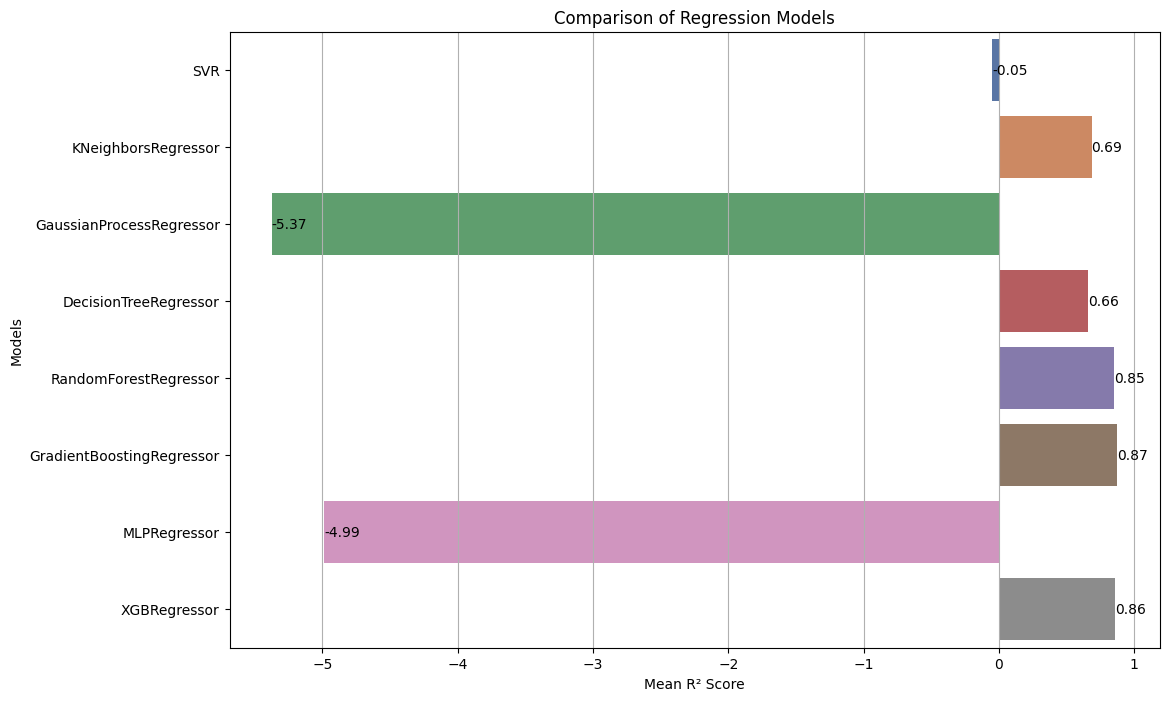

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example models_score data
models_score = [
    ('SVR', -0.051874839807911535),
    ('KNeighborsRegressor', 0.6852510746398471),
    ('GaussianProcessRegressor', -5.3743105577749475 ),
    ('DecisionTreeRegressor', 0.6592059405270246),
    ('RandomForestRegressor', 0.8485509964258817 ),
    ('GradientBoostingRegressor', 0.8747221578880422 ),
    ('MLPRegressor', -4.987432628207839),
    ('XGBRegressor', 0.8593973574975813),
]

# Create a DataFrame
df = pd.DataFrame(models_score, columns=['Model', 'Mean_R2_Score'])

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df, y='Model', x='Mean_R2_Score', palette='deep')  # Use a valid palette name

# Adding labels and title
plt.xlabel('Mean R² Score')
plt.ylabel('Models')
plt.title('Comparison of Regression Models')

# Add the score values next to the bars
for index, value in enumerate(df['Mean_R2_Score']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')

plt.grid(axis='x')

plt.show()


## **Prediction**

In [ ]:
# Train each model and make predictions
predictions = {}
for model_name, model in models.items():
  if isinstance(model, list):
    model = model[0]
    # Train the model on the entire training dataset
    model.fit(x_train,y_train)
    # Predict the sales_price on the test dataset
    y_pred = model.predict(x_train)
    predictions[model_name] = y_pred

# Print or save the predictions
for model_name, y_pred in predictions.items():
    print(f"Predictions for {model_name}: {y_pred}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Predictions for a: [163091.48609873 163015.80890566 163103.37881141 ... 163021.39913887
 162984.16002986 162999.29169803]
Predictions for b: [212286.8920068 201030.1654443 209799.5404443 ... 264880.0404443
 149244.0404443 151786.6654443]
Predictions for c: [-375476.89478839    1825.79308837  -72891.84880233 ...  128072.34429173
  274805.79341002   99285.97607333]
Predictions for d: [209960.  189100.  224200.  ... 170055.2 143425.  140400. ]
Predictions for e: [208499.99997921 181499.99998185 223499.99997766 ... 266499.99997335
 142124.99998579 147499.99998525]
Predictions for f: [208500. 181500. 223500. ... 266500. 142125. 147500.]
Predictions for g: [209469.5  178454.5  222894.18 ... 264699.99 140127.   147017.5 ]
Predictions for h: [204169.35323282 171028.62432812 214828.94935696 ... 271590.60972383
 139574.25026135 150467.86196133]
Predictions for i: [ 9888.5603678   2363.388346   11986.40135049 ...  3268.50313356
  5473.75902927  2933.39414279]
Predictions for j: [207781.25 181667.

In [ ]:
x_test

,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Normal,SaleCondition_Partial,HasPool,Age,RemodelAge,IsRemodeled,TotalLivingArea,HasFireplace,HasGarage,TotalSF
0,1461,20,80.0,11622,3,5,6,1961,1961,0.0,...,True,False,0,49,49,0,1778.0,0,1,1778.0
1,1462,20,81.0,14267,3,6,6,1958,1958,108.0,...,True,False,0,52,52,0,2658.0,0,1,2658.0
2,1463,60,74.0,13830,3,5,5,1997,1998,0.0,...,True,False,0,13,12,1,2557.0,1,1,2557.0
3,1464,60,78.0,9978,3,6,6,1998,1998,20.0,...,True,False,0,12,12,0,2530.0,1,1,2530.0
4,1465,120,43.0,5005,3,8,5,1992,1992,0.0,...,True,False,0,18,18,0,2560.0,0,1,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,3,4,7,1970,1970,0.0,...,True,False,0,36,36,0,1638.0,0,0,1638.0
1455,2916,160,21.0,1894,3,4,5,1970,1970,0.0,...,False,False,0,36,36,0,1638.0,0,1,1638.0
1456,2917,20,160.0,20000,3,5,7,1960,1996,0.0,...,False,False,0,46,10,1,2448.0,1,1,2448.0
1457,2918,85,62.0,10441,3,5,5,1992,1992,0.0,...,True,False,0,14,14,0,1882.0,0,0,1882.0


In [ ]:
 from sklearn.impute import SimpleImputer

In [ ]:
# Train each model and make predictions
predictions = {}
for model_name, model in models.items():
  if isinstance(model, list):
    model = model[0]
    # Train the model on the entire training dataset
    model.fit(x_train,y_train)
     # Impute missing values in x_test (replace this with your preferred imputation method)
    x_test = pd.DataFrame(SimpleImputer().fit_transform(x_test), columns=x_test.columns)
    # Predict the sales_price on the test dataset
    y_pred = model.predict(x_test)
    predictions[model_name] = y_pred

# Print or save the predictions
for model_name, y_pred in predictions.items():
    print(f"Predictions for {model_name}: {y_pred}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/

Predictions for a: [163011.98754768 163011.98754768 163011.98754768 ... 163011.98754768
 163011.98754768 163011.98754768]
Predictions for b: [7.14197059e+19 8.26975582e+19 8.20669324e+19 ... 7.98936677e+19
 7.29195957e+19 8.79040093e+19]
Predictions for c: [3.70203376e+08 6.62971670e+08 5.07106849e+08 ... 5.73182310e+08
 5.56315757e+08 7.65485606e+08]
Predictions for d: [268590. 244490. 268590. ... 268590. 268590. 268590.]
Predictions for e: [0. 0. 0. ... 0. 0. 0.]
Predictions for f: [184750. 184750. 745000. ... 184750. 160000. 745000.]
Predictions for g: [405244.47 387289.17 561747.87 ... 398629.99 335292.2  568056.94]
Predictions for h: [317366.02726822 263849.68840831 464519.28058189 ... 331462.91622992
 320195.51422073 473021.59952088]
Predictions for i: [6775893.88970713 5600807.60388364 8265319.58524385 ... 9667502.9922053
 6198564.82188447 7680953.85048426]
Predictions for j: [354766.28 284270.22 523366.44 ... 466701.72 331308.47 524078.  ]
